# Оптимизация в Python: глобальная оптимизация и оптимизация негладкой функции


Данное задание основано на материалах секции, посвященной оптимизационным задачам и методам их решения. Вам понадобится компьютер с установленным интерпретатором Python и подключенными библиотеками NumPy, SciPy и Matplotlib.

Вы научитесь:
- применять библиотеку SciPy для минимизации функций;
- делать выбор между градиентными и неградиентными методами оптимизации, исходя из особенностей задачи и ваших пожеланий к итоговому решению


## Введение
В этом задании вы **научитесь решать задачи оптимизации с помощью библиотеки SciPy**. Сначала вы решите задачу поиска минимума функции с помощью одного из градиентных методов оптимизации, затем увидите отличия в работе градиентного метода и одного из методов глобальной оптимизации, а в заключение – найдете глобальный минимум негладкой функции, т.е. функции, у которой не всегда определен градиент.

**Понимание задачи глобальной оптимизации и отличий градиентных методов, от методов, не использующих градиент, очень полезно в задачах анализа данных, в частности, для подбора параметров алгоритмов.**

## Материалы
Справка по функциям пакета `scipy.optimize`:
- http://docs.scipy.org/doc/scipy/reference/optimize.html 
- Matplotlib User Guide: http://matplotlib.org/users/index.html 

## Инструкция по выполнению
Данное **задание состоит из трех частей. В каждой ответом будет набор чисел, который вам нужно будет набрать через пробел в текстовом файле и загрузить. Десятичные дроби записывайте через точку**.

---

In [16]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from math import sin, exp

### Задача 1. Минимизация гладкой функции
Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]

В первом задании будем искать минимум этой функции на заданном промежутке с помощью `scipy.optimize`. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.

1. Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что функции `sin` и `exp` нужно импортировать из модуля `math`.
2. Изучите примеры использования  `scipy.optimize.minimize` [в документации Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) (см. "Материалы")
3. Попробуйте найти минимум, используя стандартные параметры в функции  `scipy.optimize.minimize` (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат. 
4. Укажите в `scipy.optimize.minimize` в качестве метода [BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm) (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. **Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.**
5. **Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой**.
6. Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

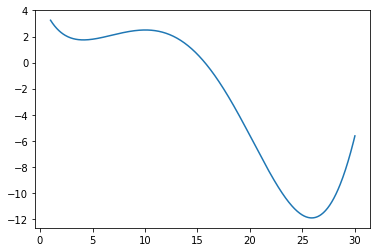

In [36]:
x = np.arange(1, 30.05, 0.05)
fx = lambda x: sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)  # функция, вычисляющуя значение f(x) по известному x

plt.plot(x, [fx(xi) for xi in x])
plt.show()

In [43]:
# Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize 
# (т.е. задав только функцию и начальное приближение). 
# Попробуйте менять начальное приближение и изучить, меняется ли результат.

for x_0 in [3, 10, 15, 28]:
    res = minimize(fun=fx, x0=x_0)
    print(res.x, res.fun, '-'*20, sep='\n')

[4.13623333]
1.7452682905857713
--------------------
[4.13630023]
1.7452682903429801
--------------------
[24.67766111]
-11.503580766270698
--------------------
[25.88019333]
-11.898894665981295
--------------------


В первых двух результатом оптимизации является локальный минимум 1.75, во втором случае "*глобальный*" минимум - -11.9. Видимо, по умолчанию используется градинентный метод поиска минимума.

In [56]:
# Укажите в качестве метода BFGS, запустите из начального приближения x=2. 
# Полученное значение функции в точке минимума - ваш первый ответ по заданию 1,
# его надо записать с точностью до 2 знака после запятой.

res = minimize(fun=fx, x0=2, method='BFGS')
print('Ответ:', round(res.fun, 2))
res

Ответ: 1.75


      fun: 1.7452682903447336
 hess_inv: array([[5.98752645]])
      jac: array([-2.04145908e-06])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627628])

In [57]:
# Теперь измените начальное приближение на x=30. 
# Значение функции в точке минимума - ваш второй ответ по заданию 1, 
# его надо записать через пробел после первого, с точностью до 2 знака после запятой.

res = minimize(fun=fx, x0=30, method='BFGS')
print('Ответ:', round(res.fun, 2))
res

Ответ: -11.9


      fun: -11.898894665981313
 hess_inv: array([[1.67936744]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019321])

### Задача 2. Глобальная оптимизация
Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.

1. Изучите документацию и примеры использования функции `scipy.optimize.differential_evolution`([см. ссылку](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html)). Обратите внимание, что **границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple)**. Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.
2. Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. **Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число**. Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.
3. Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (`nfev`) и увидеть, что у BFGS оно значительно меньше. Кроме того, **время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции**.




In [48]:
from scipy.optimize import differential_evolution

In [58]:
bounds = [(1, 30)]
result = differential_evolution(fx, bounds)
print(result.x, result.fun)
print('Ответ:', round(result.fun, 2))
result

[25.88019406] -11.898894665981006
Ответ: -11.9


     fun: -11.898894665981006
     jac: array([5.32907008e-07])
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 4
 success: True
       x: array([25.88019406])

### Задача 3. Минимизация негладкой функции
Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью `matplotlib`.

1. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.
2. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.


Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).


Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.

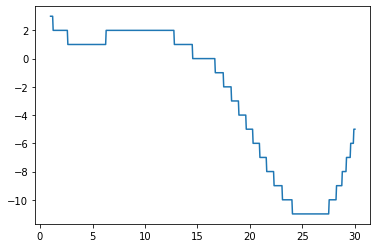

In [64]:
hx = lambda x: int(sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2))
plt.plot(x, [hx(xi) for xi in x])
plt.show()

In [68]:
# Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. 
# Получившееся значение функции – ваш первый ответ в этой задаче.

res = minimize(fun=hx, x0=30, method='BFGS')
print('Ответ:', round(res.fun, 2))
res

Ответ: -5


      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

In [69]:
# Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. 
# Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании.
# Запишите его через пробел после предыдущего.

bounds = [(1, 30)]
result = differential_evolution(hx, bounds)
print(result.x, result.fun)
print('Ответ:', result.fun)
result

[24.9382602] -11.0
Ответ: -11.0


     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 4
 success: True
       x: array([24.9382602])